In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = '/Users/thaliagiraldo/Library/Mobile Documents/com~apple~CloudDocs/CareerFoundry/Immersion/Lesson 6'

In [3]:
df = pd.read_csv(os.path.join(path, 'OHE_cleaned_Feb1.csv'), index_col = False)

In [4]:
# dropping all the nan values in trip distance miles - this removes all rows with stolen bikes
df = df.dropna(subset=['trip_distance_miles'])

In [5]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,...,start_time,end_time,ride_day_of_week,ride_day_of_week_numeric,hour_start_time,time_of_day,classic_bike,electric_bike,casual,member
0,0,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:00,2023-11-30 22:13:00,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.881101,...,09:50 PM,10:13 PM,Thursday,3,21,evening,0,1,0,1
1,1,6322270563BF5470,electric_bike,2023-11-03 09:44:00,2023-11-03 10:17:00,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.952868,...,09:44 AM,10:17 AM,Friday,4,9,morning,0,1,0,1
2,2,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:00,2023-11-30 11:40:00,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897533,...,11:39 AM,11:40 AM,Thursday,3,11,morning,0,1,0,1
3,3,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:00,2023-11-08 10:27:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,10:01 AM,10:27 AM,Wednesday,2,10,morning,1,0,0,1
4,4,EB8381AA641348DB,classic_bike,2023-11-03 16:20:00,2023-11-03 16:54:00,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.926277,...,04:20 PM,04:54 PM,Friday,4,16,afternoon,1,0,0,1


In [6]:
#Changing start time to datetime data type
df['started_at'] = pd.to_datetime(df['started_at'])

In [ ]:
df.dtypes

##Data Wrangling and Cleaning 

In [8]:
#Subsetting 

In [9]:
#preparing the columns I want to see 
# I want to see how many times each day there was a bike picked up.
day_counts = df.groupby(df['started_at'].dt.date)['started_at'].count()

In [10]:
day_counts

started_at
2023-11-01    11165
2023-11-02    14712
2023-11-03    14857
2023-11-04    16316
2023-11-05    13698
2023-11-06    16552
2023-11-07    15660
2023-11-08    13707
2023-11-09    18304
2023-11-10    13408
2023-11-11    13697
2023-11-12    12277
2023-11-13    15278
2023-11-14    17087
2023-11-15    17558
2023-11-16    18217
2023-11-17    13837
2023-11-18    13078
2023-11-19     9994
2023-11-20     9174
2023-11-21     8843
2023-11-22     8868
2023-11-23     4417
2023-11-24     4398
2023-11-25     5571
2023-11-26     3147
2023-11-27     6989
2023-11-28     7715
2023-11-29    10321
2023-11-30    13269
Name: started_at, dtype: int64

In [11]:
#making the above into a df
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values})

In [12]:
result

,date,ride_count
0,2023-11-01,11165
1,2023-11-02,14712
2,2023-11-03,14857
3,2023-11-04,16316
4,2023-11-05,13698
5,2023-11-06,16552
6,2023-11-07,15660
7,2023-11-08,13707
8,2023-11-09,18304
9,2023-11-10,13408


In [13]:
# Set the "Date" column as the index 

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count
datetime,
2023-11-01,11165
2023-11-02,14712
2023-11-03,14857
2023-11-04,16316
2023-11-05,13698


In [14]:
## explain what logic you were following when selecting your data points:
# My data set has date/time information which makes it great for a time series. 
## I chose the date and ridecount as my two data points because I want to see rides over time, whether they increased or decreased based on the day of the week or any other patterns.

##Line Chart of Data 

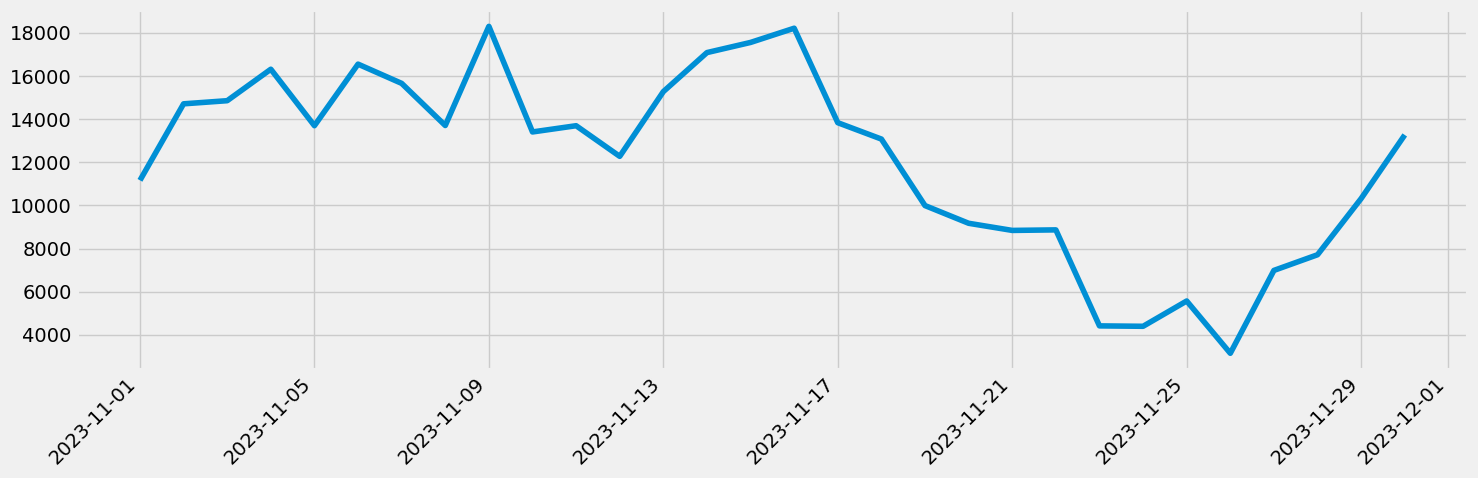

In [15]:
#Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(result) #averagerideperday uses the reset index
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [20]:
#Was constant the first two weeks
# no seasonality 

In [16]:
# Check for missing values 

result.isnull().sum() 

ride_count    0
dtype: int64

In [17]:
dups = result.duplicated()
dups.sum()

0

##Decomposing data components 

In [18]:
decomposition = sm.tsa.seasonal_decompose(result, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

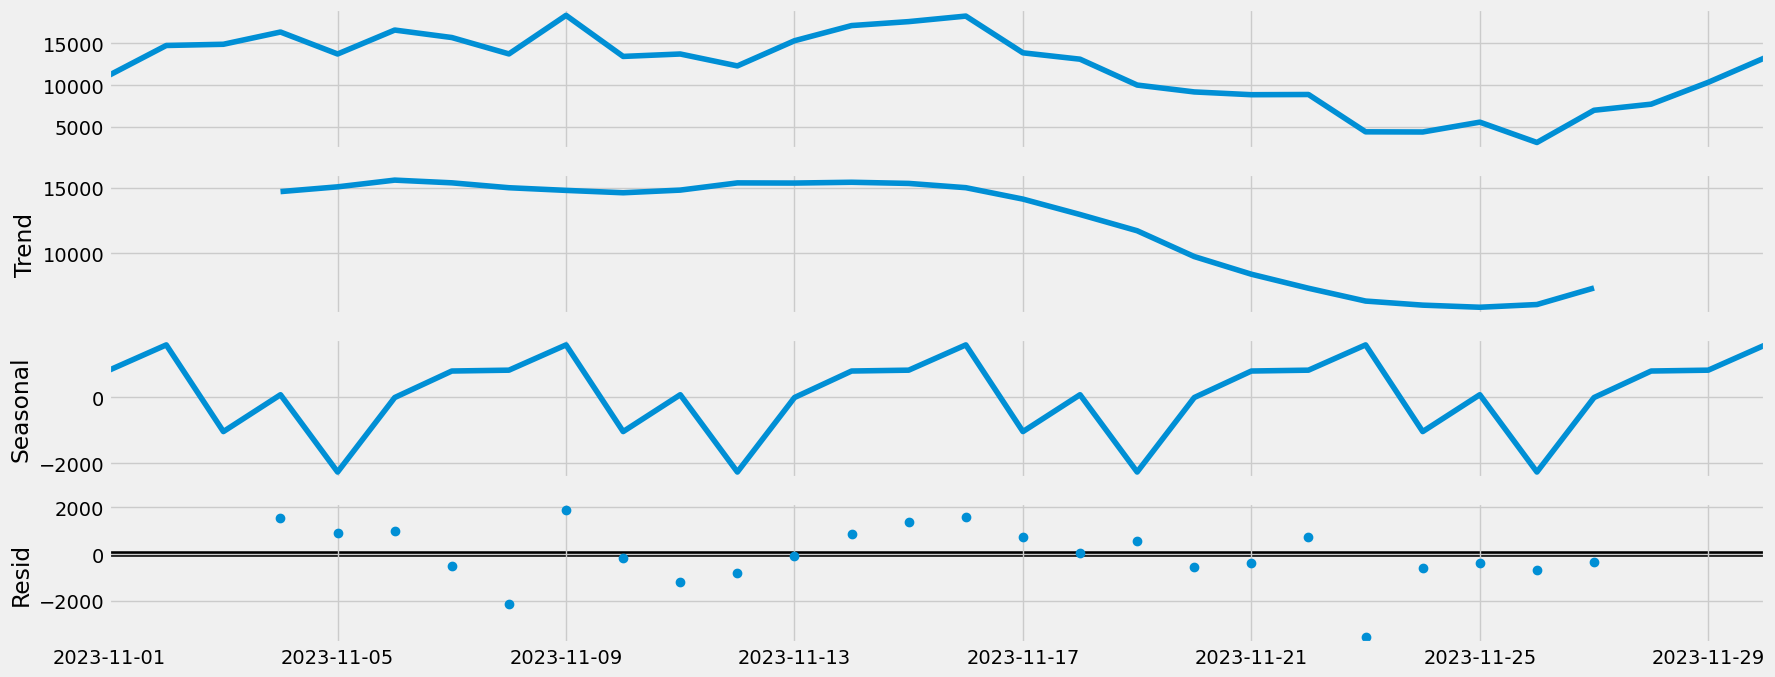

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

In [27]:
#Data seems autocorrelated, with peaks of ridership starting Thursday and dropping on Sunday. The lowest rides all month were leading up to and right after Thanksgiving
##Rides began to climb the Monday after Thanksgiving
#Ny data is currently unsmoothed which may explain why the trend and level line are different 
##In this case, I am looking at data in a one month period so even though this data is collected hourly I won't be smoothing it 

##Dickey Fuller Test

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.566114
p-value                         0.500590
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [36]:
#P value / test stat of -1.56
#Test stat is BIGGER than all of the CVs 
#WE CANNOT REJECT THE NULL HYPOTHESIS. WE HAVE TO CONFIRM THE NULL HYPOTHESIS
# THERE IS A UNIT ROOT - data is NON STATIONARY 

##Autocorrelation Check

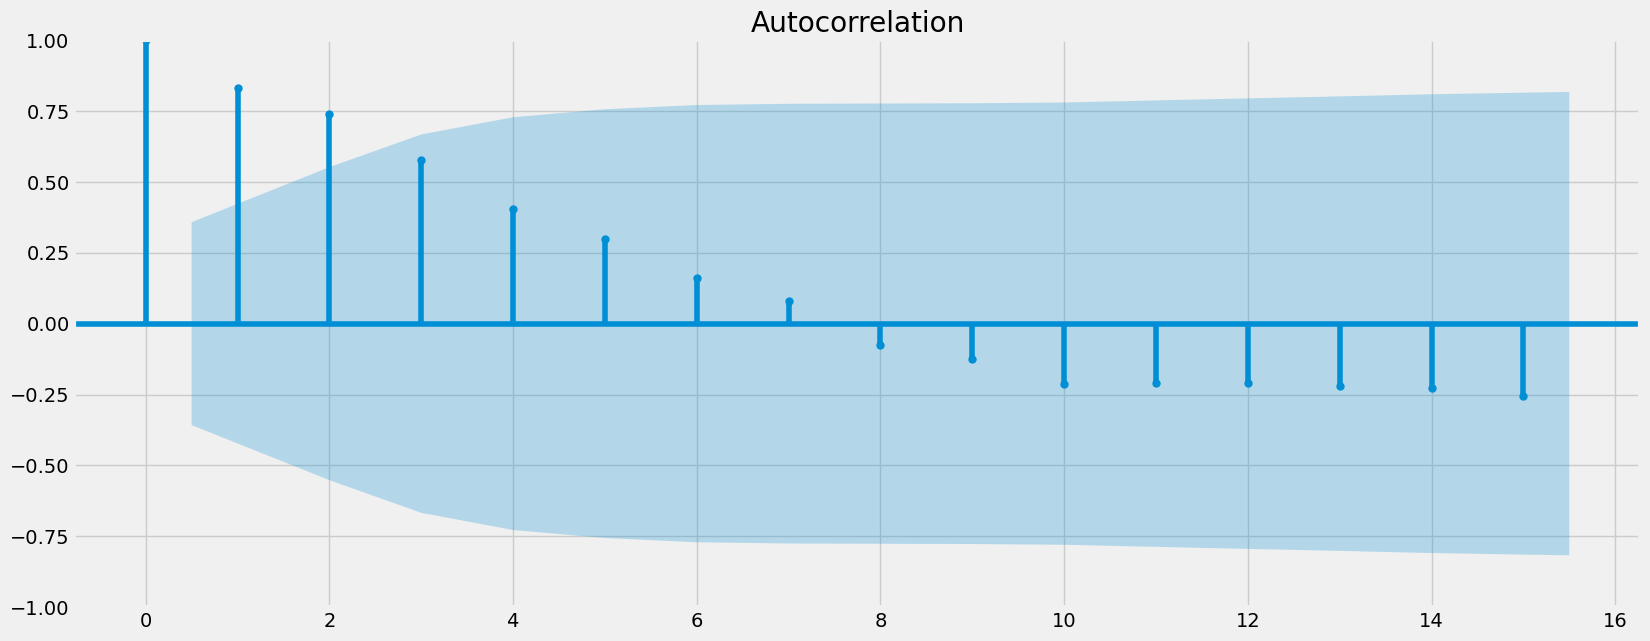

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result)
plt.show()

In [ ]:
#Vertical lines represent the lag in the series 
#blue area is the confidence interval
#when lines go above blue edge, this means you have lags that are correlated
##How much is a lot? Only 3 lines are above the blue confidence interval

In [24]:
data_diff = result - result.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [28]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [29]:
data_diff.head()

,ride_count
datetime,
2023-11-02,3547.0
2023-11-03,145.0
2023-11-04,1459.0
2023-11-05,-2618.0
2023-11-06,2854.0


In [30]:
data_diff.columns

Index(['ride_count'], dtype='object')

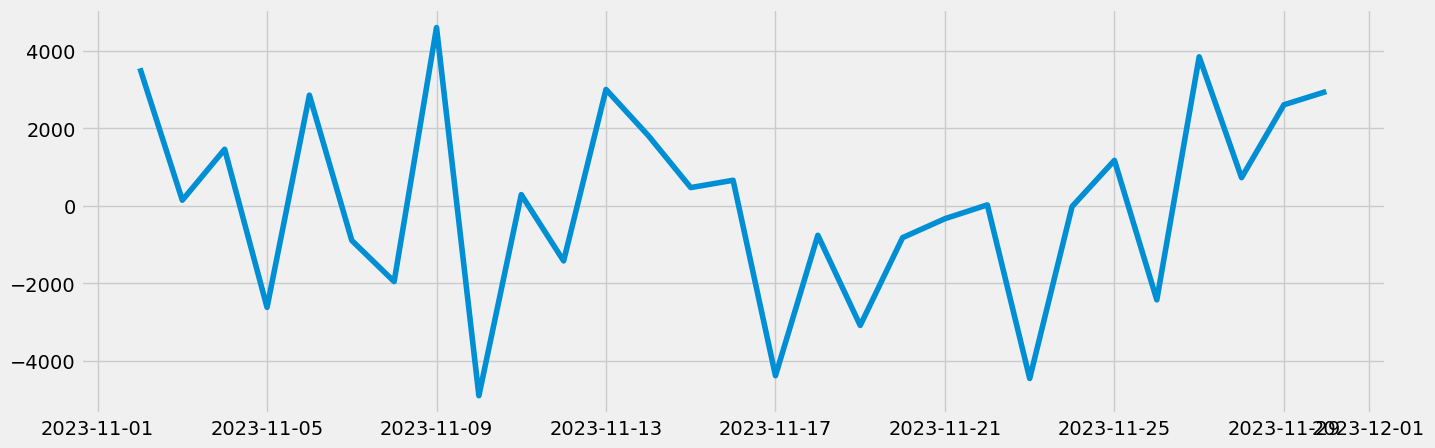

In [31]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

##New Dickey Fuller Test & AutoCorrelation

In [32]:
# Apply the test using the function on the new time series
dickey_fuller(data_diff['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.394422e+00
p-value                        2.067657e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    2.800000e+01
Critical Value (1%)           -3.688926e+00
Critical Value (5%)           -2.971989e+00
Critical Value (10%)          -2.625296e+00
dtype: float64


In [ ]:
#P value is significant bc it is less than .05
#T stat is smaller than the CV . We can reject the null hypothesis! 
#There is no unit root 
#Data is now stationary

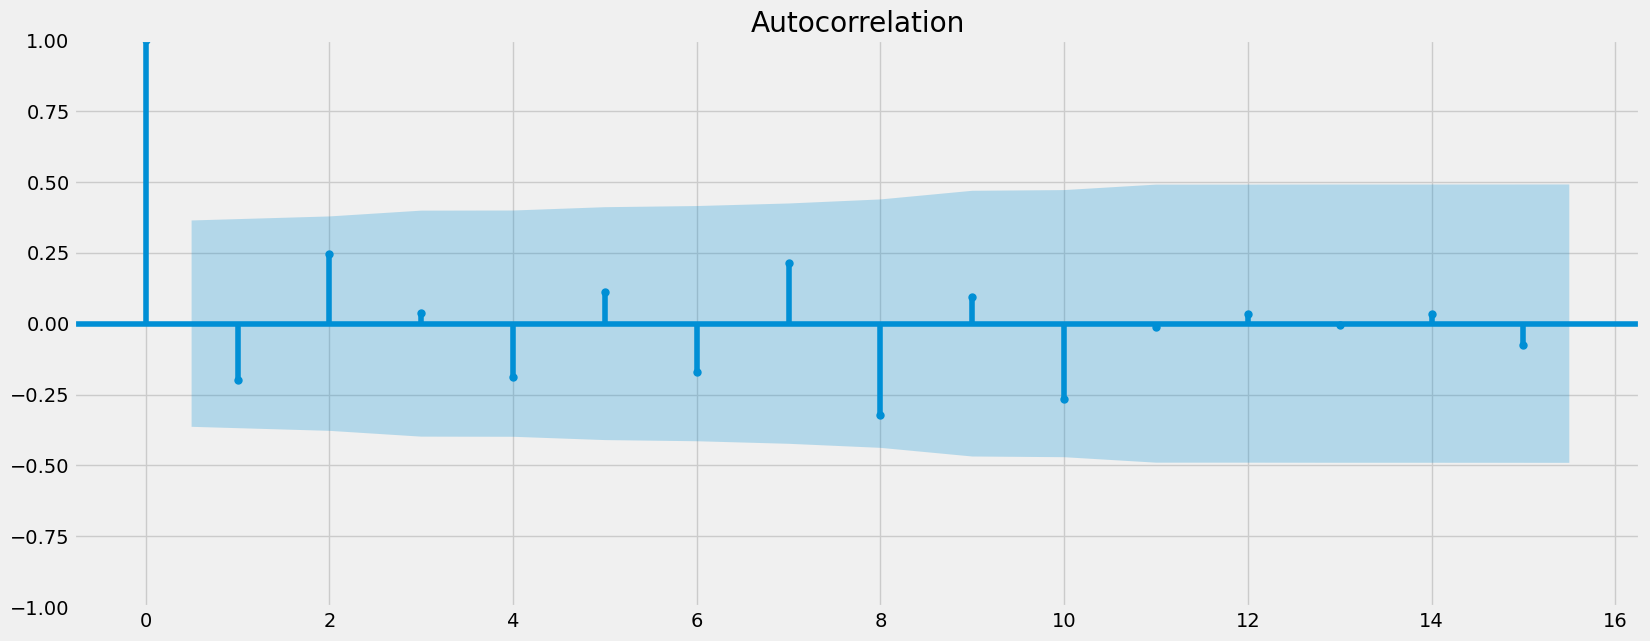

In [33]:
plot_acf(data_diff)
plt.show()

In [34]:
#Autocorrelation has improved! There's only 1 autocorrelated value?